Convolutional Dictionary Learning
=================================

This example demonstrates the use of [parcnsdl.ConvBPDNDictLearn_Consensus](http://sporco.rtfd.org/en/latest/sporco.admm.parcnsdl.html#sporco.admm.parcnsdl.ConvBPDNDictLearn_Consensus) for learning a convolutional dictionary from a set of training images. The dictionary learning algorithm is based on the ADMM consensus dictionary update [[42]](http://sporco.rtfd.org/en/latest/zreferences.html#sorel-2016-fast) [[15]](http://sporco.rtfd.org/en/latest/zreferences.html#garcia-2017-convolutional).

In [1]:
from __future__ import print_function
from builtins import input
from builtins import range

import pyfftw   # See https://github.com/pyFFTW/pyFFTW/issues/40
import numpy as np

from sporco.admm import parcnsdl
from sporco import util
from sporco import plot
plot.config_notebook_plotting()

Load training images.

In [2]:
exim = util.ExampleImages(scaled=True, zoom=0.25, gray=True)
S1 = exim.image('barbara.png', idxexp=np.s_[10:522, 100:612])
S2 = exim.image('kodim23.png', idxexp=np.s_[:, 60:572])
S3 = exim.image('monarch.png', idxexp=np.s_[:, 160:672])
S4 = exim.image('sail.png', idxexp=np.s_[:, 210:722])
S5 = exim.image('tulips.png', idxexp=np.s_[:, 30:542])
S = np.dstack((S1, S2, S3, S4, S5))

Highpass filter training images.

In [3]:
npd = 16
fltlmbd = 5
sl, sh = util.tikhonov_filter(S, fltlmbd, npd)

Construct initial dictionary.

In [4]:
np.random.seed(12345)
D0 = np.random.randn(8, 8, 64)

Set regularization parameter and options for dictionary learning solver.

In [5]:
lmbda = 0.2
opt = parcnsdl.ConvBPDNDictLearn_Consensus.Options({'Verbose': True,
                        'MaxMainIter': 200,
                        'CBPDN': {'rho': 50.0*lmbda + 0.5},
                        'CCMOD': {'rho': 1.0, 'ZeroMean': True}})

Create solver object and solve.

In [6]:
d = parcnsdl.ConvBPDNDictLearn_Consensus(D0, sh, lmbda, opt)
D1 = d.solve()
print("ConvBPDNDictLearn_Consensus solve time: %.2fs" %
      d.timer.elapsed('solve'))

Itn   Fnc       DFid      Regℓ1     
----------------------------------


   0  4.42e+02  4.42e+02  0.00e+00


   1  4.42e+02  4.42e+02  4.25e-01


   2  4.36e+02  4.33e+02  1.33e+01


   3  4.15e+02  4.02e+02  6.83e+01


   4  3.83e+02  3.47e+02  1.80e+02


   5  3.54e+02  2.87e+02  3.30e+02


   6  3.33e+02  2.35e+02  4.88e+02


   7  3.20e+02  1.94e+02  6.28e+02


   8  3.13e+02  1.65e+02  7.38e+02


   9  3.07e+02  1.45e+02  8.14e+02


  10  3.03e+02  1.31e+02  8.61e+02


  11  2.98e+02  1.22e+02  8.83e+02


  12  2.94e+02  1.16e+02  8.88e+02


  13  2.90e+02  1.13e+02  8.82e+02


  14  2.86e+02  1.12e+02  8.70e+02


  15  2.83e+02  1.12e+02  8.55e+02


  16  2.80e+02  1.12e+02  8.40e+02


  17  2.78e+02  1.12e+02  8.27e+02


  18  2.76e+02  1.13e+02  8.15e+02


  19  2.74e+02  1.13e+02  8.06e+02


  20  2.73e+02  1.13e+02  7.98e+02


  21  2.71e+02  1.13e+02  7.93e+02


  22  2.70e+02  1.12e+02  7.89e+02


  23  2.69e+02  1.12e+02  7.86e+02


  24  2.68e+02  1.12e+02  7.83e+02


  25  2.67e+02  1.11e+02  7.82e+02


  26  2.67e+02  1.10e+02  7.81e+02


  27  2.66e+02  1.10e+02  7.80e+02


  28  2.65e+02  1.09e+02  7.79e+02


  29  2.64e+02  1.09e+02  7.79e+02


  30  2.64e+02  1.08e+02  7.78e+02


  31  2.63e+02  1.08e+02  7.77e+02


  32  2.63e+02  1.07e+02  7.77e+02


  33  2.62e+02  1.07e+02  7.76e+02


  34  2.62e+02  1.07e+02  7.75e+02


  35  2.61e+02  1.06e+02  7.74e+02


  36  2.61e+02  1.06e+02  7.74e+02


  37  2.61e+02  1.06e+02  7.73e+02


  38  2.60e+02  1.06e+02  7.72e+02


  39  2.60e+02  1.06e+02  7.71e+02


  40  2.59e+02  1.05e+02  7.70e+02


  41  2.59e+02  1.05e+02  7.70e+02


  42  2.59e+02  1.05e+02  7.69e+02


  43  2.58e+02  1.05e+02  7.68e+02


  44  2.58e+02  1.05e+02  7.68e+02


  45  2.58e+02  1.04e+02  7.67e+02


  46  2.58e+02  1.04e+02  7.67e+02


  47  2.57e+02  1.04e+02  7.66e+02


  48  2.57e+02  1.04e+02  7.66e+02


  49  2.57e+02  1.04e+02  7.65e+02


  50  2.57e+02  1.04e+02  7.64e+02


  51  2.56e+02  1.04e+02  7.64e+02


  52  2.56e+02  1.04e+02  7.63e+02


  53  2.56e+02  1.03e+02  7.63e+02


  54  2.56e+02  1.03e+02  7.62e+02


  55  2.56e+02  1.03e+02  7.62e+02


  56  2.55e+02  1.03e+02  7.61e+02


  57  2.55e+02  1.03e+02  7.61e+02


  58  2.55e+02  1.03e+02  7.61e+02


  59  2.55e+02  1.03e+02  7.60e+02


  60  2.55e+02  1.03e+02  7.60e+02


  61  2.55e+02  1.03e+02  7.59e+02


  62  2.54e+02  1.03e+02  7.59e+02


  63  2.54e+02  1.03e+02  7.58e+02


  64  2.54e+02  1.02e+02  7.58e+02


  65  2.54e+02  1.02e+02  7.58e+02


  66  2.54e+02  1.02e+02  7.57e+02


  67  2.54e+02  1.02e+02  7.57e+02


  68  2.53e+02  1.02e+02  7.57e+02


  69  2.53e+02  1.02e+02  7.56e+02


  70  2.53e+02  1.02e+02  7.56e+02


  71  2.53e+02  1.02e+02  7.56e+02


  72  2.53e+02  1.02e+02  7.55e+02


  73  2.53e+02  1.02e+02  7.55e+02


  74  2.53e+02  1.02e+02  7.55e+02


  75  2.53e+02  1.02e+02  7.54e+02


  76  2.52e+02  1.02e+02  7.54e+02


  77  2.52e+02  1.02e+02  7.54e+02


  78  2.52e+02  1.01e+02  7.53e+02


  79  2.52e+02  1.01e+02  7.53e+02


  80  2.52e+02  1.01e+02  7.53e+02


  81  2.52e+02  1.01e+02  7.53e+02


  82  2.52e+02  1.01e+02  7.53e+02


  83  2.52e+02  1.01e+02  7.52e+02


  84  2.51e+02  1.01e+02  7.52e+02


  85  2.51e+02  1.01e+02  7.52e+02


  86  2.51e+02  1.01e+02  7.52e+02


  87  2.51e+02  1.01e+02  7.52e+02


  88  2.51e+02  1.01e+02  7.51e+02


  89  2.51e+02  1.01e+02  7.51e+02


  90  2.51e+02  1.01e+02  7.51e+02


  91  2.51e+02  1.01e+02  7.51e+02


  92  2.51e+02  1.01e+02  7.50e+02


  93  2.51e+02  1.01e+02  7.50e+02


  94  2.51e+02  1.01e+02  7.50e+02


  95  2.50e+02  1.00e+02  7.50e+02


  96  2.50e+02  1.00e+02  7.50e+02


  97  2.50e+02  1.00e+02  7.49e+02


  98  2.50e+02  1.00e+02  7.49e+02


  99  2.50e+02  1.00e+02  7.49e+02


 100  2.50e+02  1.00e+02  7.49e+02


 101  2.50e+02  1.00e+02  7.49e+02


 102  2.50e+02  1.00e+02  7.48e+02


 103  2.50e+02  1.00e+02  7.48e+02


 104  2.50e+02  1.00e+02  7.48e+02


 105  2.50e+02  1.00e+02  7.48e+02


 106  2.50e+02  1.00e+02  7.47e+02


 107  2.50e+02  1.00e+02  7.47e+02


 108  2.49e+02  1.00e+02  7.47e+02


 109  2.49e+02  1.00e+02  7.47e+02


 110  2.49e+02  1.00e+02  7.47e+02


 111  2.49e+02  1.00e+02  7.47e+02


 112  2.49e+02  1.00e+02  7.46e+02


 113  2.49e+02  9.99e+01  7.46e+02


 114  2.49e+02  9.99e+01  7.46e+02


 115  2.49e+02  9.99e+01  7.46e+02


 116  2.49e+02  9.99e+01  7.46e+02


 117  2.49e+02  9.98e+01  7.45e+02


 118  2.49e+02  9.98e+01  7.45e+02


 119  2.49e+02  9.98e+01  7.45e+02


 120  2.49e+02  9.98e+01  7.45e+02


 121  2.49e+02  9.97e+01  7.45e+02


 122  2.49e+02  9.97e+01  7.45e+02


 123  2.49e+02  9.97e+01  7.44e+02


 124  2.49e+02  9.97e+01  7.44e+02


 125  2.48e+02  9.96e+01  7.44e+02


 126  2.48e+02  9.96e+01  7.44e+02


 127  2.48e+02  9.96e+01  7.44e+02


 128  2.48e+02  9.96e+01  7.44e+02


 129  2.48e+02  9.96e+01  7.43e+02


 130  2.48e+02  9.95e+01  7.43e+02


 131  2.48e+02  9.95e+01  7.43e+02


 132  2.48e+02  9.95e+01  7.43e+02


 133  2.48e+02  9.95e+01  7.43e+02


 134  2.48e+02  9.95e+01  7.43e+02


 135  2.48e+02  9.94e+01  7.43e+02


 136  2.48e+02  9.94e+01  7.42e+02


 137  2.48e+02  9.94e+01  7.42e+02


 138  2.48e+02  9.94e+01  7.42e+02


 139  2.48e+02  9.94e+01  7.42e+02


 140  2.48e+02  9.93e+01  7.42e+02


 141  2.48e+02  9.93e+01  7.42e+02


 142  2.48e+02  9.93e+01  7.42e+02


 143  2.48e+02  9.93e+01  7.41e+02


 144  2.48e+02  9.93e+01  7.41e+02


 145  2.47e+02  9.92e+01  7.41e+02


 146  2.47e+02  9.92e+01  7.41e+02


 147  2.47e+02  9.92e+01  7.41e+02


 148  2.47e+02  9.92e+01  7.41e+02


 149  2.47e+02  9.92e+01  7.41e+02


 150  2.47e+02  9.92e+01  7.41e+02


 151  2.47e+02  9.91e+01  7.40e+02


 152  2.47e+02  9.91e+01  7.40e+02


 153  2.47e+02  9.91e+01  7.40e+02


 154  2.47e+02  9.91e+01  7.40e+02


 155  2.47e+02  9.91e+01  7.40e+02


 156  2.47e+02  9.91e+01  7.40e+02


 157  2.47e+02  9.90e+01  7.40e+02


 158  2.47e+02  9.90e+01  7.40e+02


 159  2.47e+02  9.90e+01  7.40e+02


 160  2.47e+02  9.90e+01  7.39e+02


 161  2.47e+02  9.89e+01  7.39e+02


 162  2.47e+02  9.89e+01  7.39e+02


 163  2.47e+02  9.89e+01  7.39e+02


 164  2.47e+02  9.89e+01  7.39e+02


 165  2.47e+02  9.89e+01  7.39e+02


 166  2.47e+02  9.88e+01  7.39e+02


 167  2.47e+02  9.88e+01  7.39e+02


 168  2.47e+02  9.88e+01  7.39e+02


 169  2.47e+02  9.88e+01  7.39e+02


 170  2.46e+02  9.88e+01  7.39e+02


 171  2.46e+02  9.87e+01  7.39e+02


 172  2.46e+02  9.87e+01  7.39e+02


 173  2.46e+02  9.87e+01  7.38e+02


 174  2.46e+02  9.87e+01  7.38e+02


 175  2.46e+02  9.87e+01  7.38e+02


 176  2.46e+02  9.86e+01  7.38e+02


 177  2.46e+02  9.86e+01  7.38e+02


 178  2.46e+02  9.86e+01  7.38e+02


 179  2.46e+02  9.86e+01  7.38e+02


 180  2.46e+02  9.86e+01  7.38e+02


 181  2.46e+02  9.86e+01  7.38e+02


 182  2.46e+02  9.85e+01  7.38e+02


 183  2.46e+02  9.85e+01  7.38e+02


 184  2.46e+02  9.85e+01  7.38e+02


 185  2.46e+02  9.85e+01  7.38e+02


 186  2.46e+02  9.85e+01  7.37e+02


 187  2.46e+02  9.85e+01  7.37e+02


 188  2.46e+02  9.84e+01  7.37e+02


 189  2.46e+02  9.84e+01  7.37e+02


 190  2.46e+02  9.84e+01  7.37e+02


 191  2.46e+02  9.84e+01  7.37e+02


 192  2.46e+02  9.84e+01  7.37e+02


 193  2.46e+02  9.84e+01  7.37e+02


 194  2.46e+02  9.84e+01  7.37e+02


 195  2.46e+02  9.84e+01  7.37e+02


 196  2.46e+02  9.84e+01  7.37e+02


 197  2.46e+02  9.84e+01  7.37e+02


 198  2.46e+02  9.83e+01  7.36e+02


 199  2.46e+02  9.83e+01  7.36e+02
----------------------------------
ConvBPDNDictLearn_Consensus solve time: 50.38s


Display initial and final dictionaries.

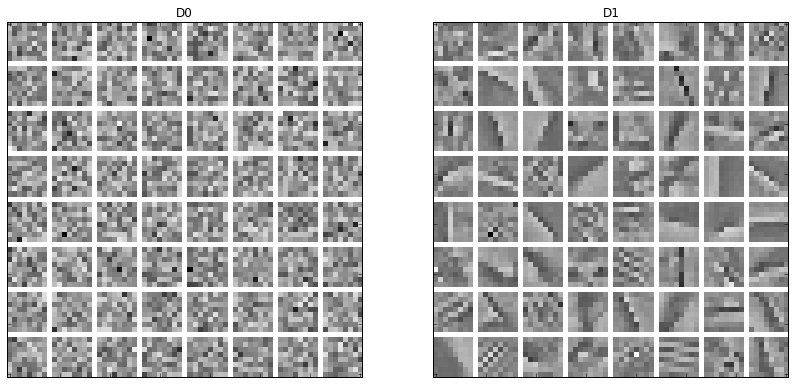

In [7]:
D1 = D1.squeeze()
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(util.tiledict(D0), fgrf=fig, title='D0')
plot.subplot(1, 2, 2)
plot.imview(util.tiledict(D1), fgrf=fig, title='D1')
fig.show()

Get iterations statistics from solver object and plot functional value

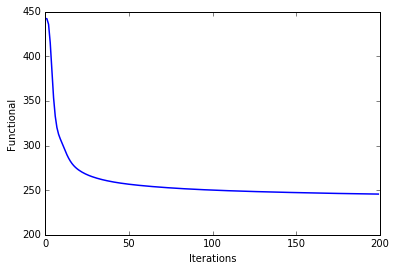

In [8]:
its = d.getitstat()
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional')